#Image Thresholding in OpenCV

Image thresholding is a fundamental technique in image processing used to separate objects or regions of interest from the background. It involves converting a grayscale or color image into a binary image, where each pixel is classified as either foreground or background based on a certain threshold value. Thresholding is particularly useful for image segmentation, object detection, and feature extraction tasks. In this notebook, we will explore different thresholding methods using the OpenCV library in Python. We will apply these techniques to enhance images, extract meaningful information, and improve subsequent analysis.




##Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing the necessary Python packages

import numpy as np          # Importing numpy for efficient numerical operations and array manipulation
from google.colab.patches import cv2_imshow         # Importing cv2_imshow from google.colab.patches to display images in Google Colab
import cv2                  # Importing cv2 from OpenCV for computer vision tasks
from PIL import Image       # Importing PIL.Image for image processing capabilities
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot for creating visualizations



## Simple Thresholding

Simple thresholding is the most fundamental technique in image processing for separating objects from their background. It forms the basis for understanding more advanced thresholding methods. While it may not be suitable for all practical applications, it is crucial to grasp its underlying principles. Simple thresholding works well with controlled lighting and clear contrast between the foreground and background. However, manually determining the optimal threshold value can be time-consuming, often requiring trial and error. To gain hands-on experience, we will proceed with a specific image example. To follow along, please save the provided image.

We can use the read_image function to read and return the image used in our demonstration.

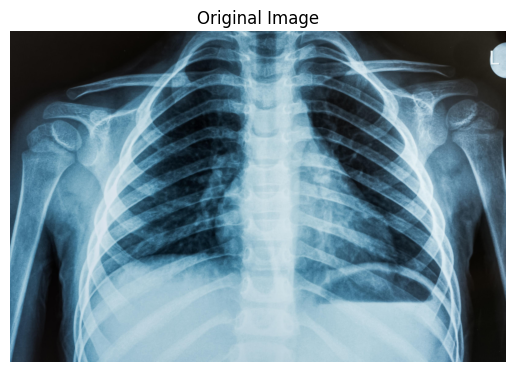

In [3]:
# Function to read and return an image
def read_image(file_path):
    # Read the image using OpenCV and convert from BGR to RGB
    image = cv2.imread(file_path, cv2.IMREAD_COLOR)[..., ::-1]
    return image

# Define the file path of the image
image_file_path = r"/content/Xray_image.jpg"

# Read the image using the defined function
xray_image = read_image(image_file_path)

# Display the image using matplotlib
plt.imshow(xray_image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [4]:
# Print image information
print(f"Image width: {xray_image.shape[1]} \nImage height: {xray_image.shape[0]} \nNumber of channels: {xray_image.shape[2] if len(xray_image.shape) == 3 else 1} \nImage data type: {xray_image.dtype}")

Image width: 3240 
Image height: 2160 
Number of channels: 3 
Image data type: uint8


In the given code snippet, the image is converted to grayscale and a Gaussian blur is applied to the grayscale image. This preprocessing is commonly performed before performing simple thresholding.

The reason for converting the image to grayscale is to simplify the image data. Grayscale images only have shades of gray ranging from black to white, whereas color images have additional color channels (such as red, green, and blue). By converting the image to grayscale, we remove the color information and focus solely on the intensity or brightness values of the pixels. This simplification can benefit thresholding operations, as we primarily aim to distinguish between different brightness levels.

Applying a Gaussian blur to the grayscale image helps to reduce high-frequency noise and smooth out the appearance. High-frequency edges and noise can interfere with thresholding, resulting in inaccurate or noisy binary images. The Gaussian blur works by convolving the image with a Gaussian kernel, which effectively averages the pixel values in the neighborhood of each pixel. This smoothing operation helps to remove noise and produce a more robust thresholding result.

Converting the image to grayscale and applying a Gaussian blur are common preprocessing steps that help prepare the image for simple thresholding. By simplifying the image and reducing noise, these steps can improve the accuracy and reliability of the thresholding operation, leading to better segmentation or analysis results.

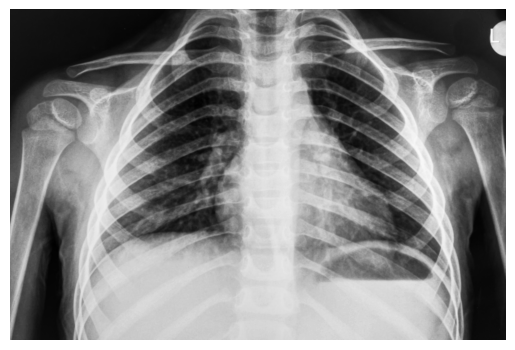

In [5]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(xray_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Display the blurred grayscale image
plt.imshow(blurred_image, cmap="gray")
plt.axis("off")
plt.show()

In the provided code, basic thresholding is applied to the blurred image. A threshold value of 100 is used, which means that if a pixel's value is greater than 100, it will be set to 255; otherwise, it will be set to 0. The third parameter in the cv2.threshold function specifies the maximum value (255 in this case) that the pixels can be set to. If you choose a different value, such as 200, pixels with values greater than 100 will be set to that value.

The threshold value of 100 was selected after conducting several trials. You can freely experiment with different values and observe the effects.

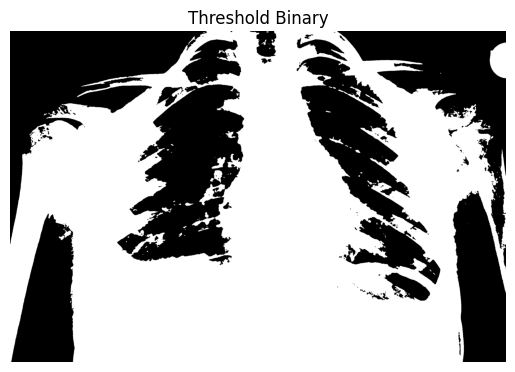

In [6]:


# Apply basic thresholding
threshold_value = 100
(T, thresh) = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh, cmap='gray')
plt.title("Threshold Binary")
plt.axis("off")
plt.show()


We have the option to use cv2.THRESH_BINARY_INV as well, which produces the opposite effect. Let's explore the image's appearance when the same threshold value of 100 is used with cv2.THRESH_BINARY_INV:

In this case, if a pixel's value exceeds the threshold value of 100, it becomes 0; otherwise, it becomes 255.The code provided applies basic thresholding using a threshold value of 100, resulting in pixels being set to 0 or 255 based on their intensity. The thresholded image is then displayed using a grayscale colormap.

I mentioned earlier that I had to conduct multiple trials to determine the optimal threshold value of 100. However, it's important to note that this threshold value may not work effectively if the lighting conditions are different for the same picture.

Working with a fixed threshold value in real-world applications where we may have yet to gain prior knowledge about lighting conditions becomes challenging. We must find an optimum threshold value that can adapt to varying lighting conditions.

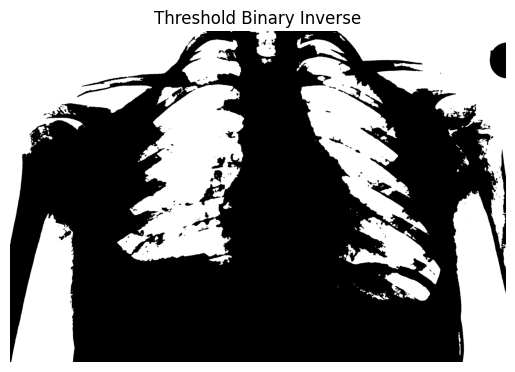

In [13]:
# Apply inverse thresholding
threshold_value = 100
(T, threshInv) = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.imshow(threshInv, cmap='gray')
plt.title("Threshold Binary Inverse")
plt.axis("off")
plt.show()

To focus on the meter reading part in the image, we can utilize the bitwise_and operation to create a mask that isolates that specific area.By applying the bitwise_and operation, the original image is masked, eliminating various background noises and disturbances.

The challenge with both simple and Otsu's thresholding methods is that they employ a single threshold value for the entire image, which may be better. The threshold value that works well for one area of the image may not yield satisfactory results for other regions.

(-0.5, 3239.5, 2159.5, -0.5)

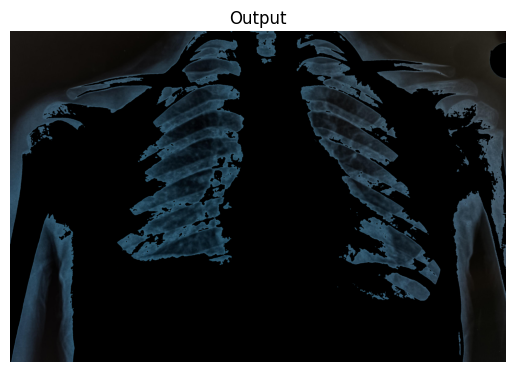

In [8]:
# Visualize only the masked regions in the image
masked = cv2.bitwise_and(xray_image, xray_image, mask=threshInv)

# Display the masked image
plt.imshow(masked)
plt.title("Output")
plt.axis("off")


The code applies the bitwise_and operation to the xray_img using the threshInv mask. This ensures that only the regions defined by the mask are preserved in the resulting image, while the rest of the image is masked out. This approach allows us to visualize only the relevant areas of the image, particularly the meter reading part.

##Otsu Thresholding

Otsu's thresholding algorithm works by calculating the optimal threshold that minimizes the intra-class variance of the two classes (foreground and background) while maximizing the inter-class variance. It assumes that the image contains two classes of pixels with distinct intensity distributions.

The input image is first preprocessed to apply Otsu's thresholding, typically by applying a blurring filter to reduce noise. Then, the cv2.threshold function is used with the cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU flag to automatically determine the best threshold value. The THRESH_BINARY_INV flag specifies that the binary inverse thresholding should be applied, meaning foreground pixels are set to 0 (black), and background pixels are set to 255 (white).

After applying Otsu's thresholding, the resulting binary image is displayed using a grayscale colormap. The threshold value determined by the algorithm is printed as T. This value represents the intensity level that separates the foreground and background pixels according to Otsu's method.

Using Otsu's thresholding, we can effectively segment objects from the background in an image without manually selecting a threshold value, making it a valuable tool for various image analysis and computer vision tasks.

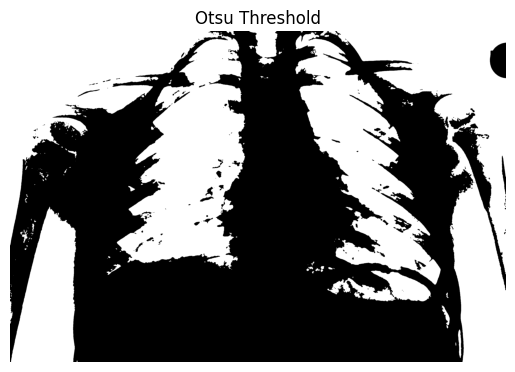

Otsu's thresholding value: 119.0


In [9]:
(T, threshOtsu) = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(threshOtsu, cmap='gray')
plt.title("Otsu Threshold")
plt.axis("off")
plt.show()

# Print the threshold value calculated by Otsu's method
print(f"Otsu's thresholding value: {T}")

In the provided code, the concept of bitwise_and operation is applied to an X-ray image, using the threshOtsu mask. This operation ensures that only the regions defined by the mask are retained in the resulting image, while the remaining parts of the image are masked out. By employing this technique, the code enables the visualization of specific areas of interest within the image, mainly focusing on the meter reading portion.

To achieve this, the cv2.bitwise_and function is utilized with the input image (xray_img) provided twice as the source and destination. The mask parameter is set to threshOtsu, a binary mask indicating the regions of interest. Consequently, only the pixels where both the input image and the mask have non-zero values are preserved, effectively masking out the rest.

The resulting image, which includes only the masked regions, is displayed using plt.imshow. The plot is titled "Output," and the axis is turned off to provide a clear visualization of the relevant areas in the image, specifically focusing on the meter reading part.

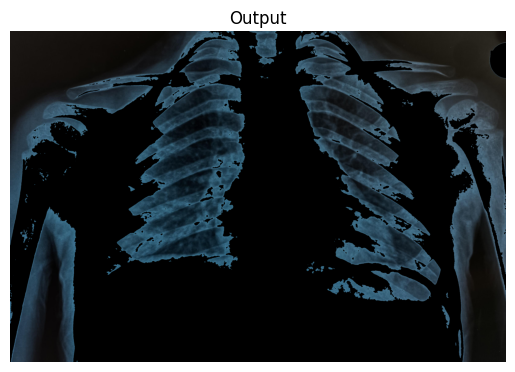

In [10]:
# Create a masked image using bitwise AND operation
masked = cv2.bitwise_and(xray_image, xray_image, mask=threshOtsu)

# Display the masked image
plt.imshow(masked)
plt.title("Output")
plt.axis("off")
plt.show()

##Adaptive Thresholding

Adaptive thresholding is a technique that automatically determines the threshold value for different parts of an image. Unlike simple thresholding, where a single threshold value is used for the entire image, adaptive thresholding calculates a unique threshold value for each small neighborhood of pixels. This is helpful when dealing with images that have varying lighting conditions or dramatic differences in pixel intensities. The method assumes that smaller regions of an image have similar lighting. The threshold value is computed using either the arithmetic mean, or the Gaussian mean of the pixel intensities in each neighborhood. Accurate thresholding results can be achieved by adjusting the neighborhood size and fine-tuning a constant. Finding the right neighborhood size is usually easier than locating the optimal threshold value.

The provided code snippet utilizes the adaptive thresholding technique using the arithmetic mean. This approach involves computing a local threshold value for every pixel neighborhood by averaging the intensities of the pixels within that neighborhood. The resulting mean value is then used as the threshold to distinguish between foreground and background pixels in the resulting binary image. By adjusting the size of the pixel neighborhood and fine-tuning a constant parameter, it is possible to refine the thresholding process and obtain the desired outcomes.

In this example, the code demonstrates the usage of adaptive thresholding with a mean weighting method. Let's break down the explanation:



1.   The second parameter of the cv2.adaptiveThreshold() function is set to 255. This means that any pixel with an intensity greater than the local threshold value will be assigned a 255 (white) value in the resulting binary image.
2.  The fifth parameter, 21, specifies that a 21x21 region of the image will be considered to compute the local threshold. This region size determines the extent of neighboring pixels considered for threshold calculation.
3. The last parameter, 5, is a constant value subtracted from the computed threshold. Adjusting this value can fine-tune the thresholding result according to the specific requirements of your project.

To effectively apply adaptive thresholding, you must carefully select the appropriate region size for computing the local threshold. Adjusting the constant value is crucial to achieving the desired thresholding outcome. Consider experimenting with different region sizes and constants based on the characteristics of your image and the desired thresholding result you wish to obtain.

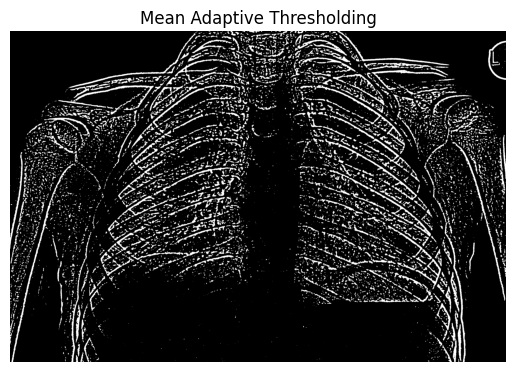

In [11]:
# Apply adaptive thresholding using a mean weighting method
# to compute the local threshold value. The resulting image will
# be a binary image with inverted colors.
threshold_value = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)

# Display the thresholded image
plt.imshow(threshold_value, cmap='gray')
plt.title("Mean Adaptive Thresholding")
plt.axis("off")
plt.show()

In Gaussian thresholding, the threshold value at a pixel (x, y) is calculated as the weighted sum of neighboring pixel values minus a constant value, C. This method involves defining a neighborhood around the pixel, applying Gaussian weighting to each pixel based on its distance from the central pixel, and computing the weighted sum. The constant value, C, allows for adjusting the threshold level. The resulting threshold value is then used to classify the pixel as foreground or background, enabling image segmentation. Gaussian thresholding provides a localized and adaptive approach to thresholding, considering neighboring pixel values and fine-tuning the threshold for accurate segmentation.

In this example, the code demonstrates the usage of adaptive thresholding with a Gaussian weighting method. Let's break down the explanation:



1. The cv2.adaptiveThreshold() function is used to apply adaptive thresholding using a Gaussian weighting method to compute the local threshold value. The resulting image will be binary.
2. The second parameter, 255, specifies the maximum pixel value assigned to the pixels that exceed the local threshold. In this case, when a pixel exceeds the local threshold, its value will be 255, resulting in a white foreground.

3. The third parameter, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, indicates the adaptive thresholding method being used. In this case, a Gaussian weighting method is employed.

4. The fourth parameter, cv2.THRESH_BINARY_INV, specifies the thresholding type. Here, THRESH_BINARY_INV means that the resulting image will have inverted colors, with foreground pixels being white (255) and background pixels being black (0).

5. The fifth parameter, 21, determines the size of the neighborhood window used to compute the local threshold. In this case, a 21x21 image region will be considered to calculate the threshold value for each pixel.

6. The sixth parameter, 3, represents a constant value that will be subtracted from the computed threshold value. This constant allows fine-tuning of the threshold level. You may choose a different region size and constant weight based on the specific project or image characteristics to achieve the desired segmentation outcome.




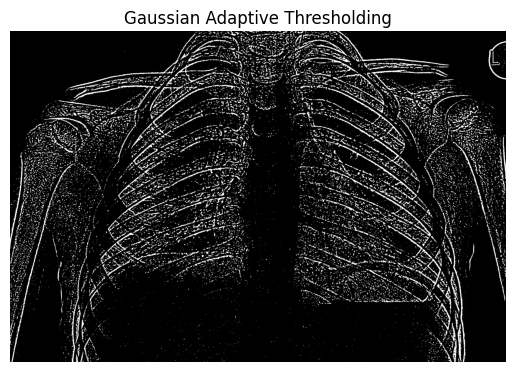

In [12]:

# Apply adaptive thresholding using a Gaussian weighting method
# to compute the local threshold value. The resulting image will
# be a binary image with inverted colors.
threshold_value = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 3)

# Display the thresholded image
plt.imshow(threshold_value, cmap='gray')
plt.title("Gaussian Adaptive Thresholding")
plt.axis("off")
plt.show()


## Color thresholding


Color thresholding is a fundamental technique in image processing used to extract specific colors or color ranges from images. By setting lower and upper threshold values for each color channel, pixels within the desired range can be identified and separated. This technique is applied after acquiring an image in a suitable color space, such as RGB or HSV. OpenCV's cv2.inRange function is commonly used to generate a binary mask that highlights colors within the specified range. The resulting mask can be further processed or combined with other masks for specific purposes. Visualisation of the original image, mask, and thresholding result aids analysis. Color thresholding has wide-ranging applications in computer vision, object detection, and image segmentation, with potential benefits in fields like robotics, medical imaging, and quality control.

The given code demonstrates the usage of color thresholding. It provides a basic implementation of color thresholding, allowing to visualise the original image, the mask indicating the detected colors and the resulting image with the extracted colors.

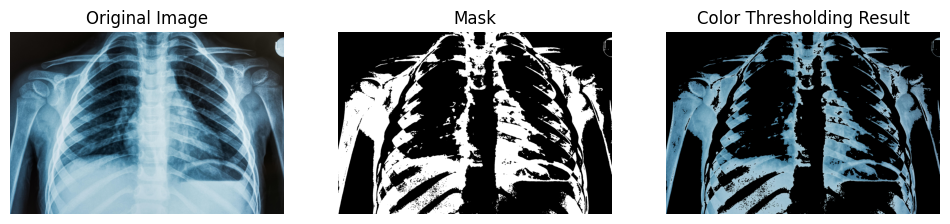

In [29]:

# Define the lower and upper threshold values for the color range you want to detect
lower_threshold = 119
upper_threshold = 200

# Create a mask based on the specified color range
mask = cv2.inRange(blurred_image, lower_threshold, upper_threshold)

# Apply the mask to the original image
result = cv2.bitwise_and(xray_image, xray_image, mask=mask)

# Display the original image, mask, and the resulting image
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(xray_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(result)
axes[2].set_title('Color Thresholding Result')
axes[2].axis('off')

plt.show()


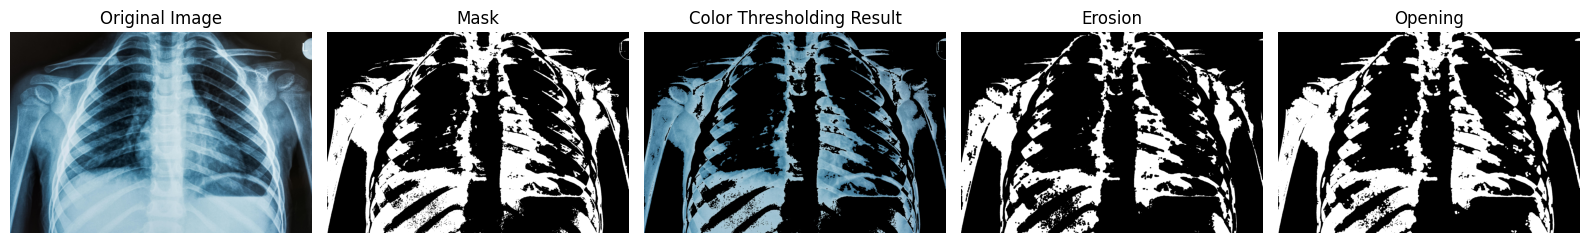

In [36]:
# Define the lower and upper threshold values for the color range you want to detect
lower_threshold = 119
upper_threshold = 200

# Create a mask based on the specified color range
mask = cv2.inRange(blurred_image, lower_threshold, upper_threshold)

# Additional code for morphology operations
kernel = np.ones((11, 11), np.uint8)
erosion = cv2.erode(mask, kernel, iterations=1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Apply the mask to the original image
result = cv2.bitwise_and(xray_image, xray_image, mask=mask)

# Display the original image, mask, and the resulting image
fig, axes = plt.subplots(1, 5, figsize=(16, 4))
images = [xray_image, mask, result, erosion, opening]
titles = ['Original Image', 'Mask', 'Color Thresholding Result', 'Erosion', 'Opening']

for ax, img, title in zip(axes, images, titles):
    if 'Mask' in title or 'Erosion' in title or 'Opening' in title:
        ax.imshow(img, cmap='gray')
    else:
        ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


##Conclusion

In conclusion, we have explored four thresholding methods: simple thresholding, Otsu thresholding, adaptive thresholding, and color thresholding. Simple thresholding is straightforward and works well when there's a clear distinction between foreground and background intensities. Otsu thresholding automatically determines the optimal threshold based on the image's intensity distribution and is helpful for bimodal images. Adaptive thresholding considers local information and benefits images with uneven lighting or complex backgrounds. Color thresholding, on the other hand, allows for segmentation based on specific color characteristics, providing an additional approach for precise object extraction.

Choosing the suitable method depends on the image's characteristics and segmentation requirements. If the image primarily relies on intensity information, simple thresholding, Otsu thresholding, or adaptive thresholding may be appropriate. However, if the color properties of objects play a crucial role, color thresholding can be employed to isolate regions based on their color characteristics.

It is important to note that each method has its strengths and limitations, and the choice of thresholding technique should be based on the specific demands of the task. Experimentation and parameter adjustment may be necessary to fine-tune the results and achieve optimal segmentation outcomes.

By considering the various thresholding methods and selecting the most suitable one, researchers and practitioners can enhance their image segmentation processes and obtain accurate and reliable results.

#Refrence

* [thresholding-using-opencv](https://towardsdatascience.com/how-to-perform-image-segmentation-with-thresholding-using-opencv-b2a78abb07ac)

* [OpenCV Thresholding](https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/?_ga=2.75264336.311991985.1688895042-1664772421.1674074395)

* [Image Thresholding ](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)



